In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import create_sequential_colors

## Ising no transverse field

In [2]:
L = 8
H_xzx = sparse_ising_hamiltonian(J=1,h_t=0,L=L,h_l=1e-7)

In [3]:
e, v = diagonalization(H_xzx, sparse=False)
print(e)

[-7.0000008 -6.9999992 -5.0000006 -5.0000006 -5.0000004 -5.0000004
 -5.0000002 -5.0000002 -5.        -5.        -4.9999998 -4.9999998
 -4.9999996 -4.9999996 -4.9999994 -4.9999994 -3.0000006 -3.0000006
 -3.0000006 -3.0000006 -3.0000006 -3.0000006 -3.0000004 -3.0000004
 -3.0000004 -3.0000004 -3.0000004 -3.0000004 -3.0000002 -3.0000002
 -3.0000002 -3.0000002 -3.0000002 -3.0000002 -3.        -3.
 -3.        -3.        -3.        -3.        -2.9999998 -2.9999998
 -2.9999998 -2.9999998 -2.9999998 -2.9999998 -2.9999996 -2.9999996
 -2.9999996 -2.9999996 -2.9999996 -2.9999996 -2.9999994 -2.9999994
 -2.9999994 -2.9999994 -2.9999994 -2.9999994 -1.0000004 -1.0000004
 -1.0000004 -1.0000004 -1.0000004 -1.0000004 -1.0000004 -1.0000004
 -1.0000004 -1.0000004 -1.0000002 -1.0000002 -1.0000002 -1.0000002
 -1.0000002 -1.0000002 -1.0000002 -1.0000002 -1.0000002 -1.0000002
 -1.0000002 -1.0000002 -1.0000002 -1.0000002 -1.0000002 -1.0000002
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.     

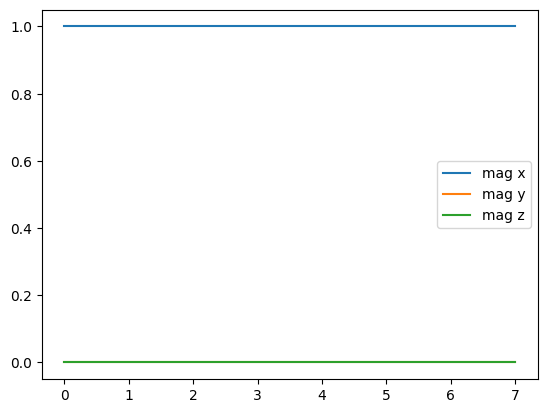

In [4]:
psi = v[:,0]
mag_x = []
mag_y = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_y(n=i, L=L)) @ psi).real
    mag_y.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_y,label="mag y")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

In [5]:
psi

array([-0.0625-0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625-0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625-0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625-0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625-0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625-0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
       -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625-0.j,
       -0.0625-0.j, -0.0625+0.j, -0.0625-0.j, -0.0625+0.j, -0.06

## Add an external field

In [21]:
L = 12
mag_x = []
mag_z = []
npoints = 100
mag_loc_x = np.zeros((npoints,L))
mag_loc_z = np.zeros((npoints,L))
fidelity = []
fidelity_sup = []
energies = []
couplings = np.linspace(0,1.5,npoints)
h_l = 1e-4
i = 0
sup_state = 1/np.sqrt(2*L)*np.ones(2**L)
for lamb in couplings:
    print(f"transverse field: {lamb}")
    H = sparse_ising_hamiltonian(J=1, h_t=lamb, h_l=h_l, L=L, deg=2)
    e, v = diagonalization(H, sparse=True)
    psi = v[:,0].copy()
    e, v = diagonalization(H, sparse=True, k=3, maxiter=2000)
    energies.append(e)
    mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
    mag_x.append(mag)
    for site in range(L):
        mag = (psi.conjugate() @ (sparse_pauli_x(n=site, L=L)) @ psi).real
        mag_loc_x[i,site] = mag
    mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
    mag_z.append(mag)
    for site in range(L):
        mag = (psi.conjugate() @ (sparse_pauli_z(n=site, L=L)) @ psi).real
        mag_loc_z[i,site] = mag
    if i >= 1:
        fidelity.append(psi_prev.conjugate().T @ psi)
        fidelity_sup.append(sup_state.conjugate().T @ psi)
    i += 1
    psi_prev = psi.copy()

transverse field: 0.0
transverse field: 0.015151515151515152
transverse field: 0.030303030303030304
transverse field: 0.045454545454545456
transverse field: 0.06060606060606061
transverse field: 0.07575757575757576
transverse field: 0.09090909090909091
transverse field: 0.10606060606060606
transverse field: 0.12121212121212122
transverse field: 0.13636363636363635
transverse field: 0.15151515151515152
transverse field: 0.16666666666666669
transverse field: 0.18181818181818182
transverse field: 0.19696969696969696
transverse field: 0.21212121212121213
transverse field: 0.2272727272727273
transverse field: 0.24242424242424243
transverse field: 0.25757575757575757
transverse field: 0.2727272727272727
transverse field: 0.2878787878787879
transverse field: 0.30303030303030304
transverse field: 0.3181818181818182
transverse field: 0.33333333333333337
transverse field: 0.3484848484848485
transverse field: 0.36363636363636365
transverse field: 0.3787878787878788
transverse field: 0.39393939393

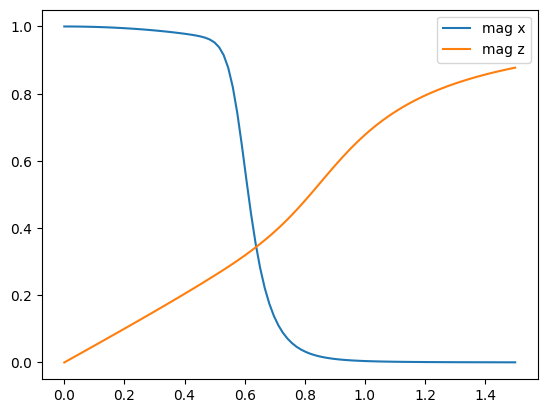

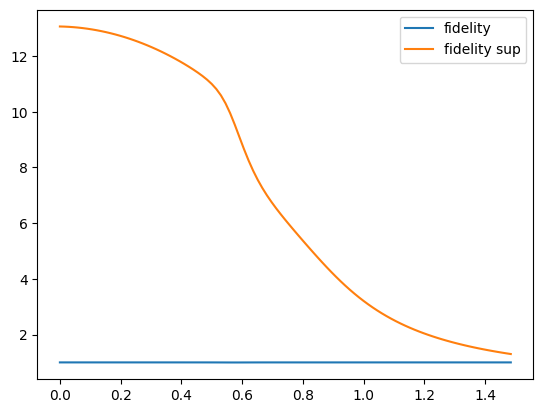

In [23]:
plt.plot(couplings,mag_x,label="mag x")
plt.plot(couplings,mag_z,label="mag z")
plt.legend()
plt.show()
plt.plot(couplings[:-1], np.abs(fidelity), label="fidelity")
plt.plot(couplings[:-1], np.abs(fidelity_sup), label="fidelity sup")
plt.legend()
plt.show()

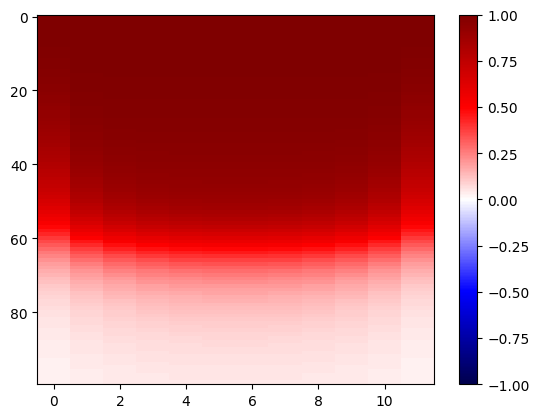

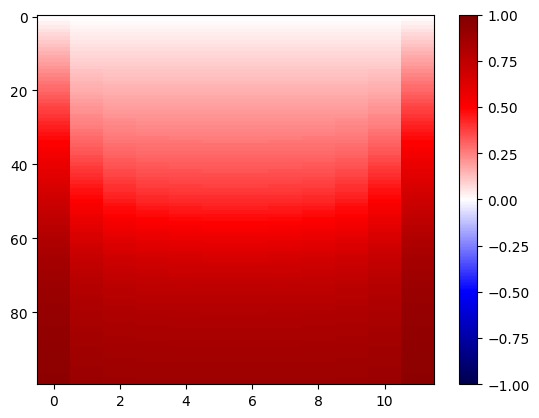

In [16]:
plt.imshow(mag_loc_x, aspect='auto', vmin=-1, vmax=1, cmap='seismic')
plt.colorbar()
plt.show()
plt.imshow(mag_loc_z, aspect='auto', vmin=-1, vmax=1, cmap='seismic')
plt.colorbar()


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_7588\1849229066.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,1]), label="$\Delta_{\leftarrow}^{\\rightarrow}$ ")
C:\Users\HP\AppData\Local\Temp\ipykernel_7588\1849229066.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,2]), label="$\Delta_{o}^{ex}$")


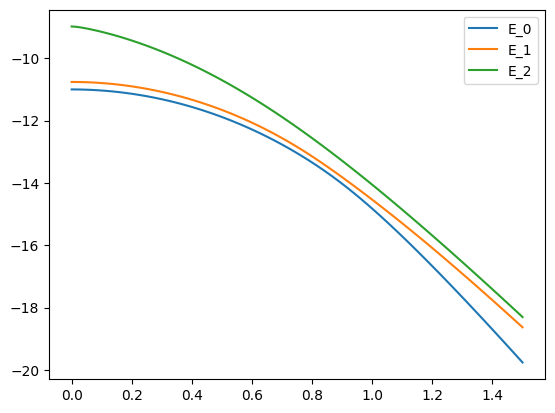

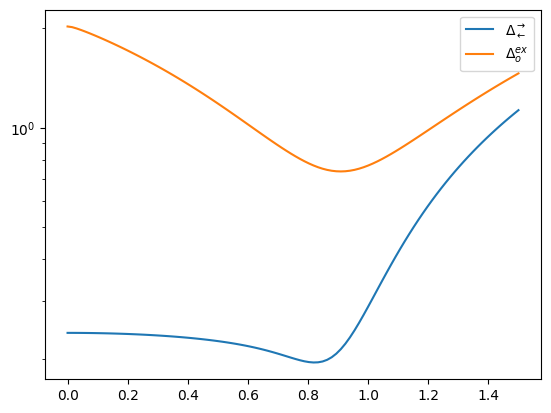

In [17]:
plt.plot(couplings, np.asarray(energies)[:,0], label='E_0')
plt.plot(couplings, np.asarray(energies)[:,1], label='E_1')
plt.plot(couplings, np.asarray(energies)[:,2], label='E_2')
plt.legend()
plt.show()
plt.plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,1]), label="$\Delta_{\leftarrow}^{\\rightarrow}$ ")
plt.plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,2]), label="$\Delta_{o}^{ex}$")
plt.yscale('log')
plt.legend()

## Change $L$

In [63]:
Ls = [10,11,12,13,14,15]
fid_tot = []
e_tot = []
for L in Ls:
    mag_x = []
    mag_z = []
    npoints = 50
    mag_loc_x = np.zeros((npoints,L))
    mag_loc_z = np.zeros((npoints,L))
    fidelity_L = []
    energies_L = []
    couplings = np.linspace(0,1.5,npoints)
    i = 0
    for lamb in couplings:
        print(f"transverse field: {lamb}")
        H = sparse_ising_hamiltonian(J=1, h_t=lamb, h_l=1e-7, L=L)
        e, v = diagonalization(H, sparse=True)
        psi = v[:,0].copy()
        e, v = diagonalization(H, sparse=True, k=3, maxiter=2000)
        energies_L.append(e)
        # mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        # mag_x.append(mag)
        # for site in range(L):
        #     mag = (psi.conjugate() @ (sparse_pauli_x(n=site, L=L)) @ psi).real
        #     mag_loc_x[i,site] = mag
        # mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        # mag_z.append(mag)
        # for site in range(L):
        #     mag = (psi.conjugate() @ (sparse_pauli_z(n=site, L=L)) @ psi).real
        #     mag_loc_z[i,site] = mag
        if i >= 1:
            fidelity_L.append(psi_prev.conjugate().T @ psi)
        i += 1
        psi_prev = psi.copy()
    fid_tot.append(fidelity_L)
    e_tot.append(energies_L)

transverse field: 0.0
transverse field: 0.030612244897959183
transverse field: 0.061224489795918366
transverse field: 0.09183673469387754
transverse field: 0.12244897959183673
transverse field: 0.15306122448979592
transverse field: 0.18367346938775508
transverse field: 0.21428571428571427
transverse field: 0.24489795918367346
transverse field: 0.2755102040816326
transverse field: 0.30612244897959184
transverse field: 0.336734693877551
transverse field: 0.36734693877551017
transverse field: 0.3979591836734694
transverse field: 0.42857142857142855
transverse field: 0.45918367346938777
transverse field: 0.4897959183673469
transverse field: 0.5204081632653061
transverse field: 0.5510204081632653
transverse field: 0.5816326530612245
transverse field: 0.6122448979591837
transverse field: 0.6428571428571428
transverse field: 0.673469387755102
transverse field: 0.7040816326530612
transverse field: 0.7346938775510203
transverse field: 0.7653061224489796
transverse field: 0.7959183673469388
tran

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\318491602.py:16: SyntaxWarning: invalid escape sequence '\D'
  label0 = "$\Delta_{\leftarrow}^{\\rightarrow}$"
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\318491602.py:17: SyntaxWarning: invalid escape sequence '\D'
  label1 = "$\Delta_{o}^{ex}$"
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\318491602.py:24: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_title("Energy gap $\Delta$")


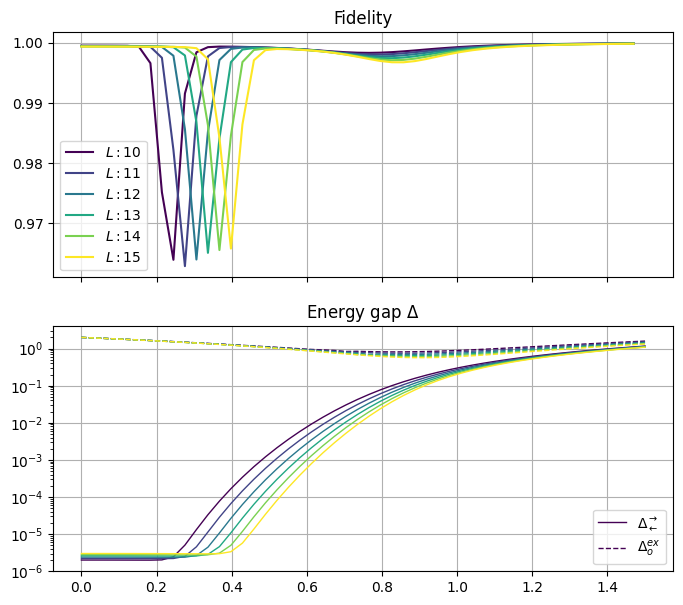

In [66]:
colors = create_sequential_colors(len(Ls))

fig, ax = plt.subplots(2,1,sharex=True, figsize=(8,7))

i = 0
for L, fidelities in zip(Ls, fid_tot):
    ax[0].plot(couplings[:-1], [np.abs(f) for f in fidelities], color=colors[i], label=f"$L: {L}$")
    i +=1
ax[0].set_title("Fidelity")
ax[0].legend()
ax[0].grid()

i = 0
for L, energies in zip(Ls, e_tot):
    if i == 0:
        label0 = "$\Delta_{\leftarrow}^{\\rightarrow}$"
        label1 = "$\Delta_{o}^{ex}$"
    else:
        label0 = None
        label1 = None
    ax[1].plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,1]), color=colors[i], linewidth=1, label=label0)
    ax[1].plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,2]), color=colors[i], linestyle='--', linewidth=1, label=label1)
    i +=1
ax[1].set_title("Energy gap $\Delta$")
ax[1].set_yscale('log')
ax[1].grid()
ax[1].legend()

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2389263983.py:9: SyntaxWarning: invalid escape sequence '\D'
  label0 = "$\Delta_{\leftarrow}^{\\rightarrow}$"
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2389263983.py:10: SyntaxWarning: invalid escape sequence '\D'
  label1 = "$\Delta_{o}^{ex}$"
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2389263983.py:34: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Energy gap $\Delta$ $vs$ Fidelity")


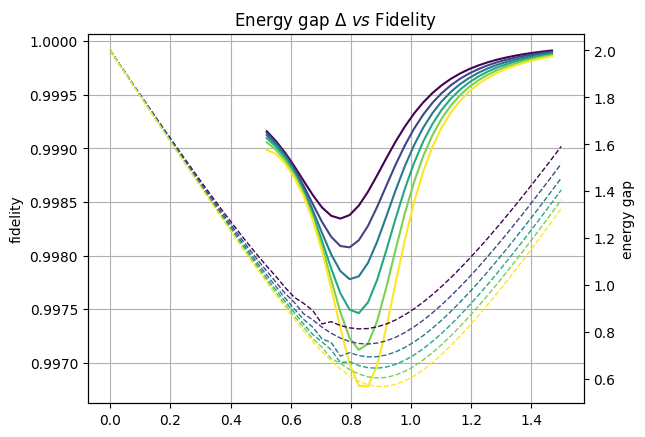

In [79]:
# Create the figure and first axis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

i = 0
for L, energies, fidelities in zip(Ls, e_tot, fid_tot):
    if i == 0:
        label0 = "$\Delta_{\leftarrow}^{\\rightarrow}$"
        label1 = "$\Delta_{o}^{ex}$"
    else:
        label0 = None
        label1 = None
    ax1.plot(couplings[17:-1], [np.abs(f) for f in fidelities][17:], color=colors[i], label=f"$L: {L}$")
    
    ax2.plot(couplings, np.abs(np.asarray(energies)[:,0]-np.asarray(energies)[:,2]), color=colors[i], linestyle='--', linewidth=1, label=label1)
    i +=1
    
ax2.tick_params(axis='y')
ax2.set_ylabel("energy gap")
ax1.tick_params(axis='y')
ax1.set_ylabel("fidelity")
# # Plot on the first y-axis
# ax1.plot(x, y1, 'b-', label='sin(x)')
# ax1.set_xlabel('x')
# ax1.set_ylabel('sin(x)', color='b')
# ax1.tick_params(axis='y', labelcolor='b')

# # Create a second y-axis sharing the same x-axis
# ax2 = ax1.twinx()
# ax2.plot(x, y2, 'r--', label='exp(0.3x)')
# ax2.set_ylabel('exp(0.3x)', color='r')
# ax2.tick_params(axis='y', labelcolor='r')
plt.title("Energy gap $\Delta$ $vs$ Fidelity")
# plt.yscale('log')
ax1.grid(True)


## Make it 2D

In [14]:
L = 15
mag_x = []
mag_z = []
rdms = []
grid_h = np.linspace(0, 2, 32).tolist()
grid_h.reverse()
grid_j = np.linspace(0, 2, 32)

v0 = np.zeros((2**L,1))
v0[0] = 1

for j in grid_j:
    mag_x_j = []
    mag_z_j = []
    rdm_j = []
    for h in grid_h:
        print(f"transverse field h: {h} for j: {j}")
        H = sparse_ising_hamiltonian(J=j, h_t=h, h_l=1e-3, L=L)
        e, v = diagonalization(H, sparse=True, v0=v0)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_j.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_j.append(mag)
        if h == grid_h[0]:
            v0_j = psi
        v0 = psi

        chain = MPS(L=L, d=2, model="Cluster", chi=128)
        chain.vector_to_mps(vec=psi, chi=128)
        rdm = chain.reduced_density_matrix([L//2])
        rdm_j.append(rdm)

    v0 = v0_j
    mag_x_j.reverse()
    mag_z_j.reverse()
    rdm_j.reverse()
    mag_x.append(mag_x_j)
    mag_z.append(mag_z_j)
    rdms.append(rdm_j)

transverse field h: 2.0 for j: 0.0
transverse field h: 1.935483870967742 for j: 0.0
transverse field h: 1.8709677419354838 for j: 0.0
transverse field h: 1.8064516129032258 for j: 0.0
transverse field h: 1.7419354838709677 for j: 0.0
transverse field h: 1.6774193548387095 for j: 0.0
transverse field h: 1.6129032258064515 for j: 0.0
transverse field h: 1.5483870967741935 for j: 0.0
transverse field h: 1.4838709677419355 for j: 0.0
transverse field h: 1.4193548387096775 for j: 0.0
transverse field h: 1.3548387096774193 for j: 0.0
transverse field h: 1.2903225806451613 for j: 0.0
transverse field h: 1.2258064516129032 for j: 0.0
transverse field h: 1.161290322580645 for j: 0.0
transverse field h: 1.096774193548387 for j: 0.0
transverse field h: 1.032258064516129 for j: 0.0
transverse field h: 0.967741935483871 for j: 0.0
transverse field h: 0.9032258064516129 for j: 0.0
transverse field h: 0.8387096774193548 for j: 0.0
transverse field h: 0.7741935483870968 for j: 0.0
transverse field h: 

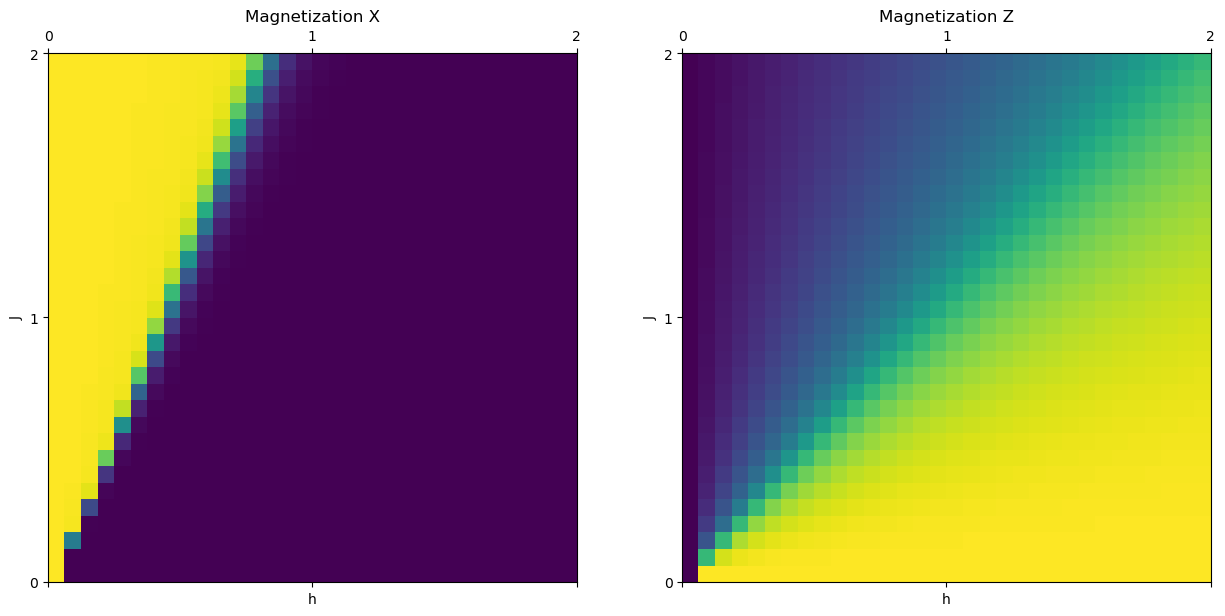

In [10]:
params = [[j,h] for j in grid_j for h in grid_j]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("h")
ax[0].set_ylabel("J")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("h")
ax[1].set_ylabel("J");

In [13]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/rdms_data/1_sites-rdms_ising_L_{L}_h-j_0.0-2.0_delta_32_degeneracy_method_1_guess_path.npy", rdms)

## Cluster-$XY$ model

Ferro in $Y$

In [9]:
H = sparse_cluster_xy_hamiltonian(J=0, h_t=0, h_x=0, h_y=-1, L=6)
e, v = diagonalization(H, sparse=False)
psi = v[:,0]
print(e)
print(psi)
print((1/np.sqrt(2))**6)

[-5.00001 -4.99999 -3.00001 -3.00001 -3.00001 -3.00001 -3.00001 -2.99999
 -2.99999 -2.99999 -2.99999 -2.99999 -1.00001 -1.00001 -1.00001 -1.00001
 -1.00001 -1.00001 -1.00001 -1.00001 -1.00001 -1.00001 -0.99999 -0.99999
 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999 -0.99999
  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999  0.99999
  0.99999  0.99999  1.00001  1.00001  1.00001  1.00001  1.00001  1.00001
  1.00001  1.00001  1.00001  1.00001  2.99999  2.99999  2.99999  2.99999
  2.99999  3.00001  3.00001  3.00001  3.00001  3.00001  4.99999  5.00001]
[ 1.25000000e-01+0.00000000e+00j  1.25000000e-01-1.83311720e-14j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
 -1.25000000e-01+2.50000000e-06j -1.25000000e-01+2.50000002e-06j
  1.25000000e-06+1.25000000e-01j  1.25000002e-06+1.25000000e-01j
 -1.25000000e-01+2.50000000e-06j -1.25000000e-01+2.50000002e-06j
 -1.25000000e-01+2.500000

## $h_x=0$ case

In [48]:
# we can insert additional interaction terms in XX or YY or both
L=12
hys = np.linspace(-4,4,16)
hs = np.linspace(-2,4,16)

mag_x = []
mag_z = []
rdms = []
for hy in hys:
    mag_x_h = []
    mag_z_h = []
    rdms_h = []
    for h in hs:
        print(f"hy: {hy}, h: {h}")
        H = sparse_cluster_xy_hamiltonian(J=1, h_t=h, h_x=0, h_y=hy, L=L)
        e, v = diagonalization(H, sparse=True)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_h.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_h.append(mag)

        chain = MPS(L=L, d=2, model="Cluster", chi=32)
        chain.vector_to_mps(vec=psi, chi=32)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1,L//2+2])
        rdms_h.append(rdm)

    mag_x.append(mag_x_h)
    mag_z.append(mag_z_h)
    rdms.append(rdms_h)

hy: -4.0, h: -2.0
hy: -4.0, h: -1.6
hy: -4.0, h: -1.2
hy: -4.0, h: -0.7999999999999998
hy: -4.0, h: -0.3999999999999999
hy: -4.0, h: 0.0
hy: -4.0, h: 0.40000000000000036
hy: -4.0, h: 0.8000000000000003
hy: -4.0, h: 1.2000000000000002
hy: -4.0, h: 1.6
hy: -4.0, h: 2.0
hy: -4.0, h: 2.4000000000000004
hy: -4.0, h: 2.8000000000000007
hy: -4.0, h: 3.2
hy: -4.0, h: 3.6000000000000005
hy: -4.0, h: 4.0
hy: -3.466666666666667, h: -2.0
hy: -3.466666666666667, h: -1.6
hy: -3.466666666666667, h: -1.2
hy: -3.466666666666667, h: -0.7999999999999998
hy: -3.466666666666667, h: -0.3999999999999999
hy: -3.466666666666667, h: 0.0
hy: -3.466666666666667, h: 0.40000000000000036
hy: -3.466666666666667, h: 0.8000000000000003
hy: -3.466666666666667, h: 1.2000000000000002
hy: -3.466666666666667, h: 1.6
hy: -3.466666666666667, h: 2.0
hy: -3.466666666666667, h: 2.4000000000000004
hy: -3.466666666666667, h: 2.8000000000000007
hy: -3.466666666666667, h: 3.2
hy: -3.466666666666667, h: 3.6000000000000005
hy: -3.4666

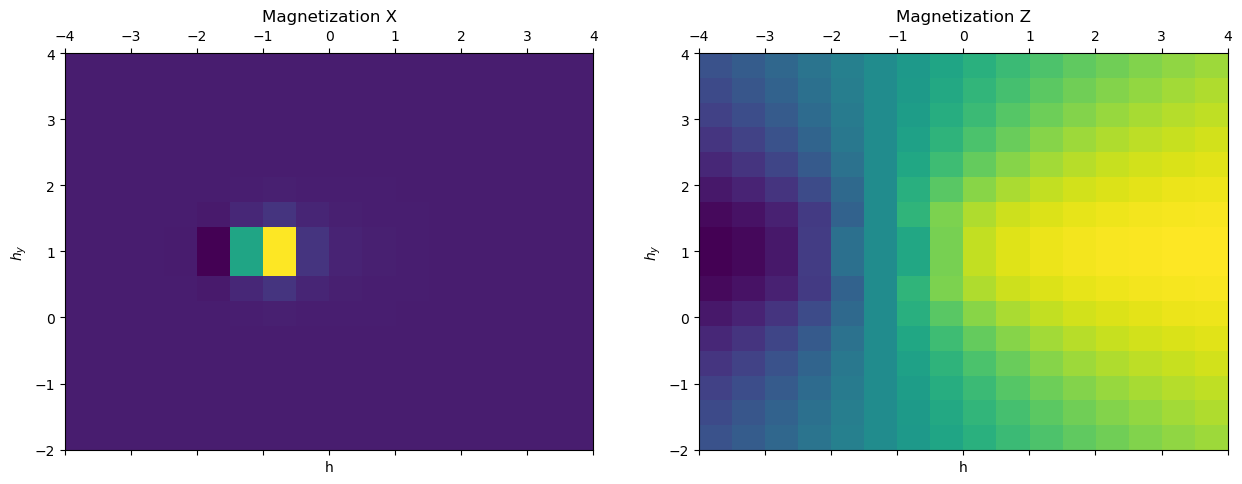

In [49]:
params = [[hy,h] for hy in hys for h in hs]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("h")
ax[0].set_ylabel("$h_y$")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("h")
ax[1].set_ylabel("$h_y$");

In [50]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/5_sites-rdms_Cluster-XY_L_{L}_hx_-2.0-4.0_hy_-4.0-4.0_delta_16_degeneracy_method_0_guess_path_False.npy", rdms)

## $h=0$ case

In [51]:
# we can insert additional interaction terms in XX or YY or both
L=12
hxs = np.linspace(-4,4,16)
hys = np.linspace(-4,4,16)

mag_x = []
mag_z = []
rdms = []
for hy in hys:
    mag_x_h = []
    mag_z_h = []
    rdms_h = []
    for hx in hxs:
        print(f"hy: {hy}, hx: {hx}")
        H = sparse_cluster_xy_hamiltonian(J=1, h_t=0, h_x=hx, h_y=hy, L=L)
        e, v = diagonalization(H, sparse=True)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_h.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_h.append(mag)

        chain = MPS(L=L, d=2, model="Cluster", chi=32)
        chain.vector_to_mps(vec=psi, chi=32)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1,L//2+2])
        rdms_h.append(rdm)

    mag_x.append(mag_x_h)
    mag_z.append(mag_z_h)
    rdms.append(rdms_h)

hy: -4.0, hx: -4.0
hy: -4.0, hx: -3.466666666666667
hy: -4.0, hx: -2.9333333333333336
hy: -4.0, hx: -2.4
hy: -4.0, hx: -1.8666666666666667
hy: -4.0, hx: -1.3333333333333335
hy: -4.0, hx: -0.7999999999999998
hy: -4.0, hx: -0.2666666666666666
hy: -4.0, hx: 0.2666666666666666
hy: -4.0, hx: 0.7999999999999998
hy: -4.0, hx: 1.333333333333333
hy: -4.0, hx: 1.8666666666666663
hy: -4.0, hx: 2.4000000000000004
hy: -4.0, hx: 2.9333333333333336
hy: -4.0, hx: 3.466666666666667
hy: -4.0, hx: 4.0
hy: -3.466666666666667, hx: -4.0
hy: -3.466666666666667, hx: -3.466666666666667
hy: -3.466666666666667, hx: -2.9333333333333336
hy: -3.466666666666667, hx: -2.4
hy: -3.466666666666667, hx: -1.8666666666666667
hy: -3.466666666666667, hx: -1.3333333333333335
hy: -3.466666666666667, hx: -0.7999999999999998
hy: -3.466666666666667, hx: -0.2666666666666666
hy: -3.466666666666667, hx: 0.2666666666666666
hy: -3.466666666666667, hx: 0.7999999999999998
hy: -3.466666666666667, hx: 1.333333333333333
hy: -3.466666666666

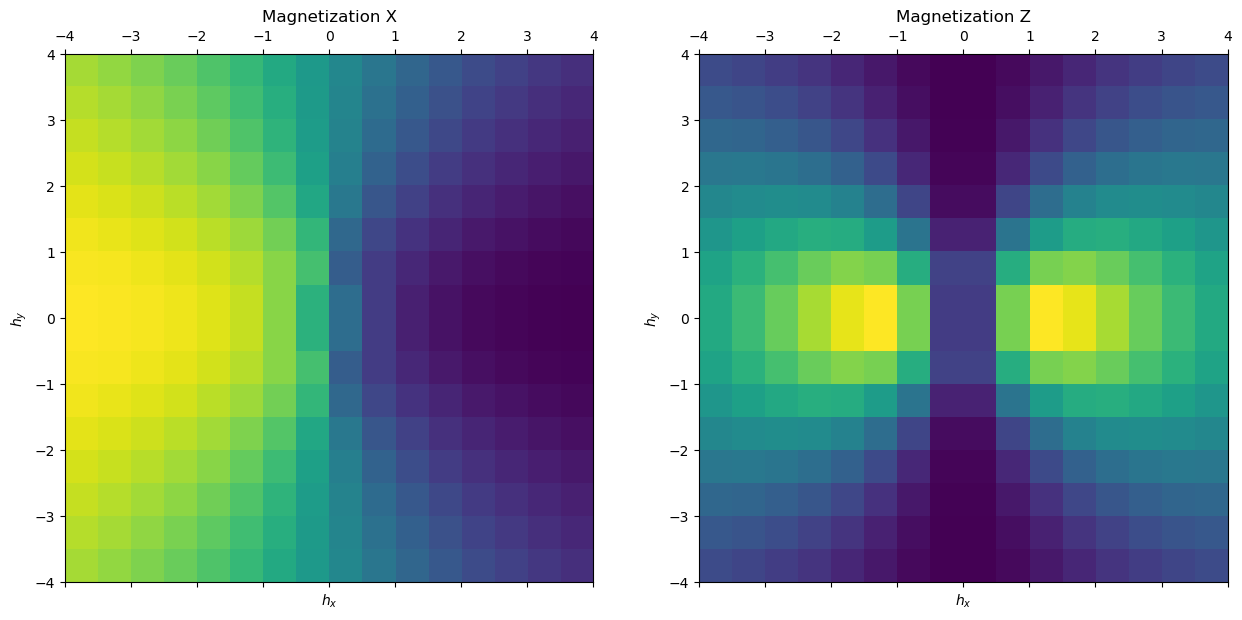

In [52]:
params = [[hy,hx] for hy in hys for hx in hxs]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("$h_x$")
ax[0].set_ylabel("$h_y$")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("$h_x$")
ax[1].set_ylabel("$h_y$");

In [53]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/5_sites-rdms_Cluster-XY_L_{L}_hx_-4.0-4.0_hy_-4.0-4.0_delta_16_degeneracy_method_0_guess_path_False.npy", rdms)